# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Sentiment Analysis and Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from our_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


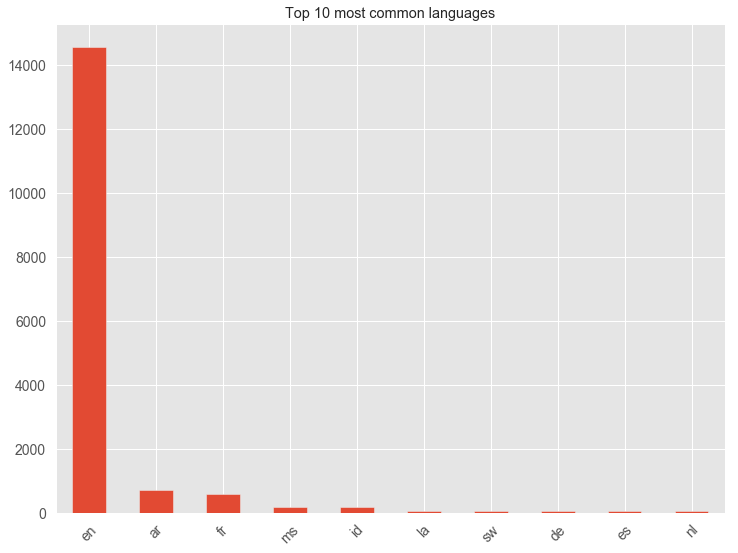

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
%run ./cleaning_18052019.ipynb

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_scores(sentence):
    return analyser.polarity_scores(sentence)

df['vader_sentiment'] = df['tweets_unedit'].apply(sentiment_scores)

In [31]:
df = df.assign(vader_neg=df.vader_sentiment.apply(pd.Series)['neg'].values)
df = df.assign(vader_pos=df.vader_sentiment.apply(pd.Series)['pos'].values)
df = df.assign(vader_neu=df.vader_sentiment.apply(pd.Series)['neu'].values)
df = df.assign(vader_polarity=df.vader_sentiment.apply(pd.Series)['compound'].values)

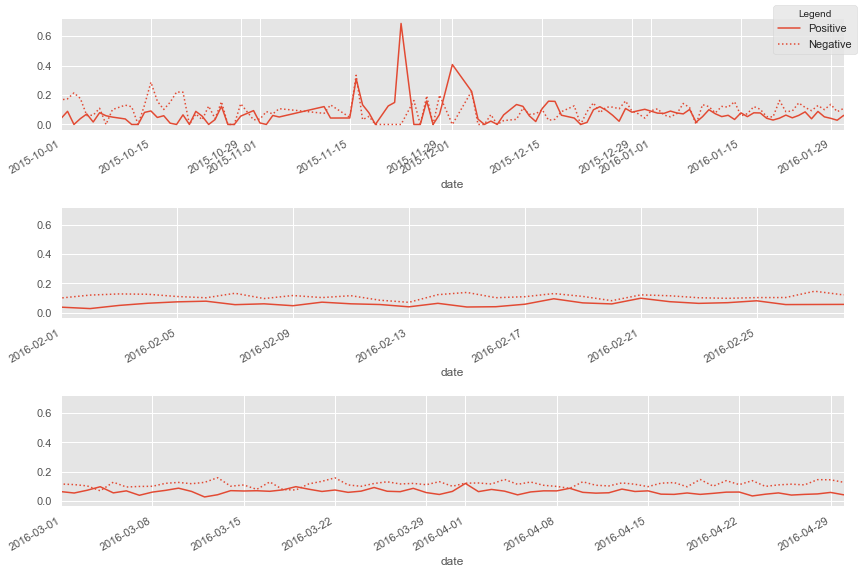

In [32]:
sub = df[['vader_pos', 'vader_neg', 'vader_neu', 'vader_polarity', 'date']].groupby(['date']).mean().reset_index()
sub.set_index('date', inplace=True)

fig = plot_periods(sub['vader_pos'], sub['vader_neg'])
fig.legend(labels=["Positive", "Negative"], loc = "upper right", title="Legend")

In [3]:
from textblob import TextBlob
def get_polarity(s):
     return TextBlob(s).sentiment.polarity
    
def get_subjectivity(s):
    return TextBlob(s).sentiment.subjectivity

# Unedited tweets  --- results are the same when using preprocessed tweets.
df['polarity'] = df['tweets_unedit'].apply(get_polarity)
df['subjectivity'] = df['tweets_unedit'].apply(get_subjectivity)

NameError: name 'df' is not defined

In [23]:
sub = df[['polarity','subjectivity','date']].groupby(['date']).mean().reset_index()
sub.set_index('date', inplace = True)

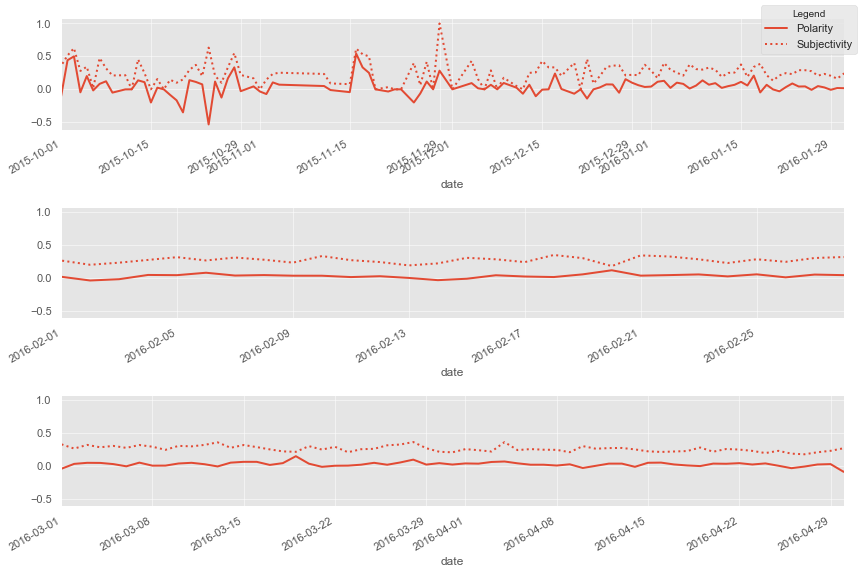

In [24]:
fig = plot_periods(sub['polarity'],sub['subjectivity'])
fig.legend(labels=["Polarity", "Subjectivity"], loc = "upper right", title="Legend")
plt.savefig('figures_exam_project/polarity_subjectivity_timestamp.png')


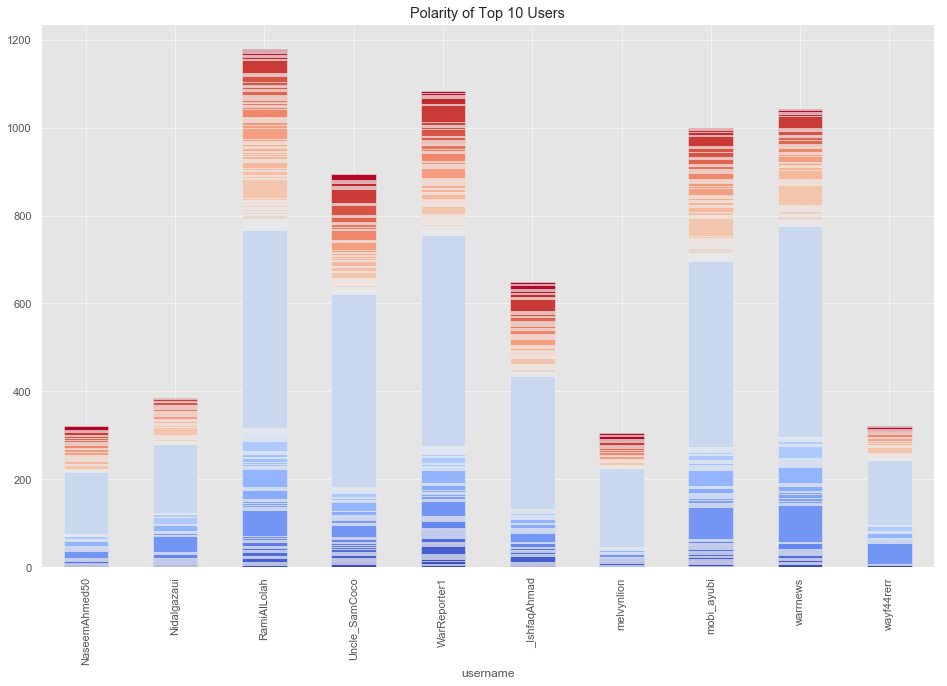

In [25]:
# Sentiments by top 10 users
# Define Top 10 users
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]

# Make graph
pd.crosstab(top10_users.username, top10_users.polarity).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")
plt.legend().set_visible(False)
plt.title("Polarity of Top 10 Users")
plt.savefig('figures_exam_project/polarity_top10.png')

# Text classification